# Calculus Review
**Contents:**
1. Taylor Series
2. Gauss Newton
3. Levenberg Marqaurdt

## 1. Taylor Series Visualization

In [68]:
'''Vishal Reddy Mandadi
'''

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return np.cos(x)

def get_nth_taylor_term(x, a, n, fact_n):
    '''Generates nth taylor term given x, a, for f(x) = cos(x)
    '''
    if n%4==0:
        return np.cos(a)*np.power(x-a, n) / fact_n
    elif n%4==1:
        return -1*np.sin(a)*np.power(x-a, n) / fact_n
    if n%4==2:
        return -1*np.cos(a)*np.power(x-a, n) / fact_n
    if n%4==3:
        return np.sin(a)*np.power(x-a, n) / fact_n
    

def taylor_approx(x, a, trunc=1):
    '''Returns taylor series approximations for Cosine function given x, and a

    Note: Returns a set of inputs and their corresponding values s.t. values<15 and > -15

    Return:
    final_values: Taylor series approx of np.cos
    x: Inputs for np.cos
    '''
    if trunc<1:
        print("Invalid truncation factor. It must be an integer greater than or equal to 1")
        exit(1)
    value = 0
    fact_n = 1
    for i in range(trunc):
        if i!=0:
            fact_n *= i
        value += get_nth_taylor_term(x, a, i, fact_n)
        
    final_value = np.delete(value, np.where(((value[:] > 15) | (value[:] < -15))))
    final_x = np.delete(x, np.where(((value[:] > 15) | (value[:] < -15))))
    
    return [final_value, final_x]


a = 0
x = np.linspace(-8, 8, 50)
y = []
y.append(taylor_approx(x=x, a=a, trunc=1))
y.append(taylor_approx(x=x, a=a, trunc=3))
y.append(taylor_approx(x=x, a=a, trunc=6))
y.append(taylor_approx(x=x, a=a, trunc=9))
y.append(taylor_approx(x=x, a=a, trunc=12))
y.append(taylor_approx(x=x, a=a, trunc=15))

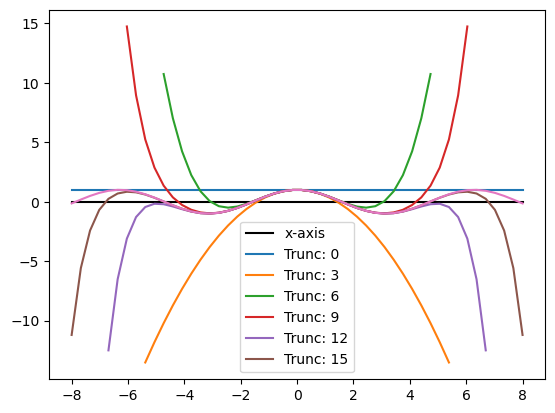

In [71]:
plt.figure(1)
plt.plot(x, np.zeros(shape=len(x)), color='k', label='x-axis')
for i in range(6):
    plt.plot(y[i][1], y[i][0], label=f'Trunc: {i*3}')
plt.plot(x, np.cos(x))
plt.legend()